In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dataset.csv')
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [2]:
df.head().style.set_properties(**{'background-color':'blue','color':'white','border-color':'#8b8c8c'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [3]:
df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,5048704.412000,2895904.500488,103368.000000,2536439.500000,4952508.500000,7681877.000000,9990855.000000
age,1000.000000,49.242000,17.864730,20.000000,34.000000,49.000000,64.250000,80.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.980000,0.953157,0.000000,0.000000,1.000000,2.000000,3.000000
restingBP,1000.000000,151.747000,29.965228,94.000000,129.000000,147.000000,181.000000,200.000000
serumcholestrol,1000.000000,311.447000,132.443801,0.000000,235.750000,318.000000,404.250000,602.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.748000,0.770123,0.000000,0.000000,1.000000,1.000000,2.000000
maxheartrate,1000.000000,145.477000,34.190268,71.000000,119.750000,146.000000,175.000000,202.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [5]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

Analyse data

In [6]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
gender_count = df['gender'].value_counts()
chest_pain_counts = df['chestpain'].value_counts()
print(age_range)
print(gender_count)
print(chest_pain_counts)

Age Range: 20 - 80
gender
1    765
0    235
Name: count, dtype: int64
chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


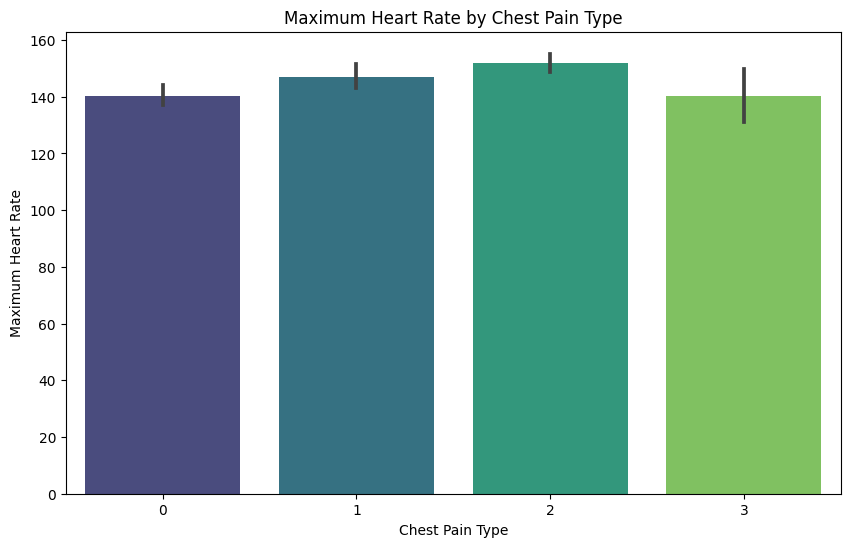

In [7]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [8]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


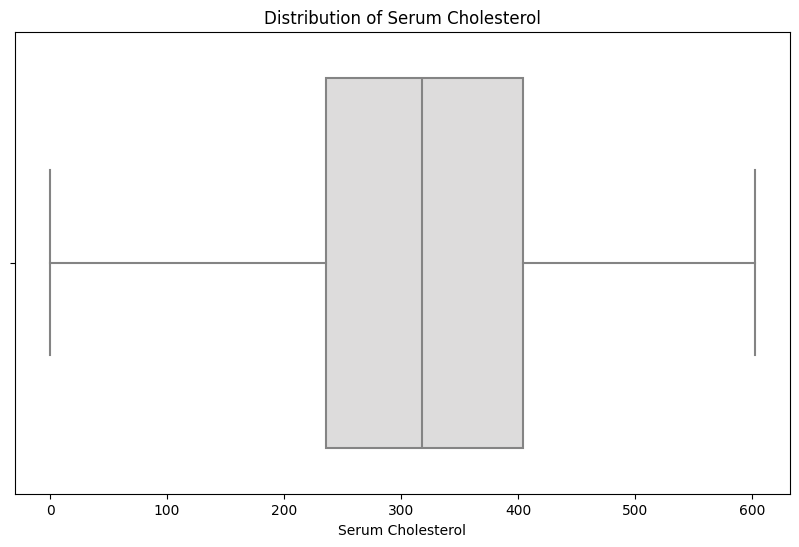

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [10]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%
restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

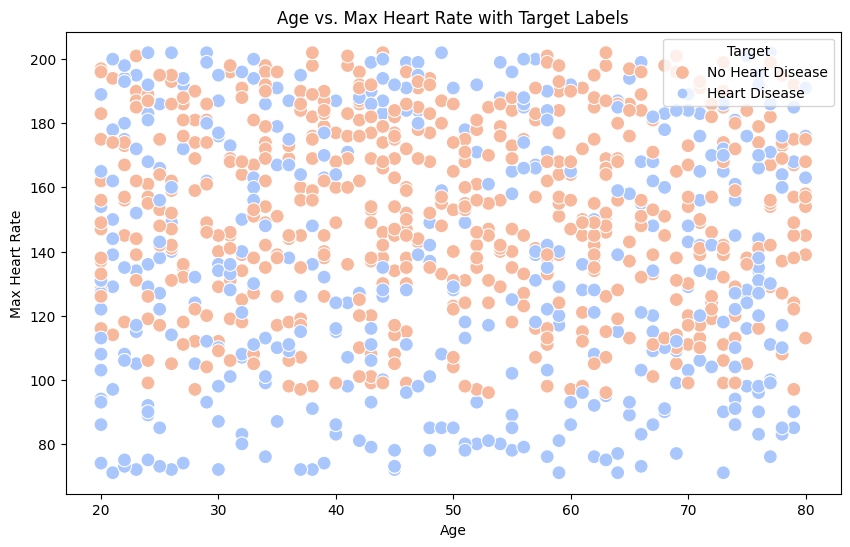

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [12]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Maximum Heart Rate: 145.48
Number of Patients with Exercise-Induced Angina: 498
Average Oldpeak: 2.71


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


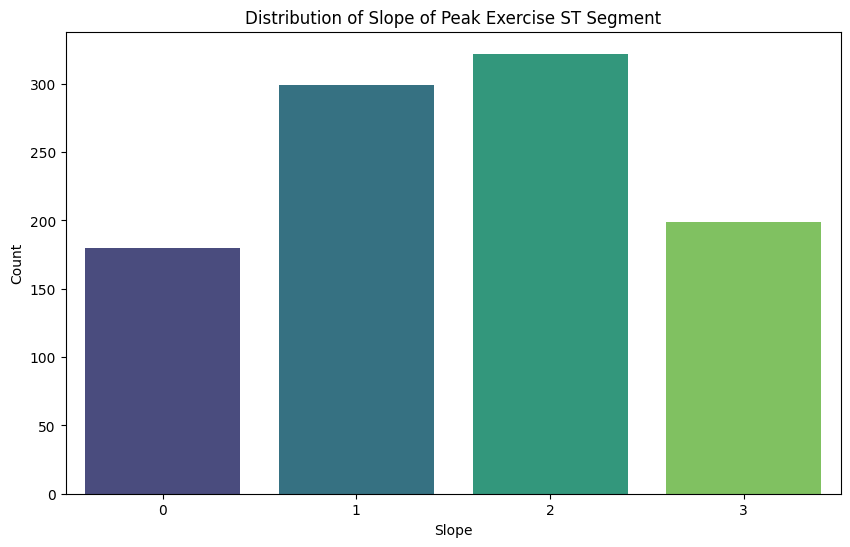

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()

In [14]:
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")
# add percentage of female and men having heart discease

Number of Major Vessels Range: 0 - 3
Percentage of Patients with Heart Disease: 58.00%


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

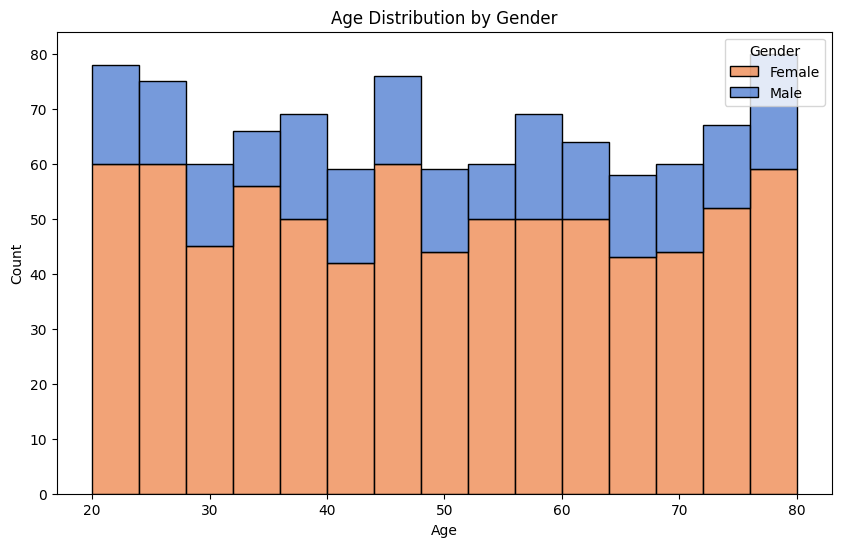

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

In [16]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")
correlation_age_maxheartrate = df['age'].corr(df['maxheartrate'])
print(f"Correlation between Age and Maximum Heart Rate: {correlation_age_maxheartrate:.2f}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64
Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64
Co

/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

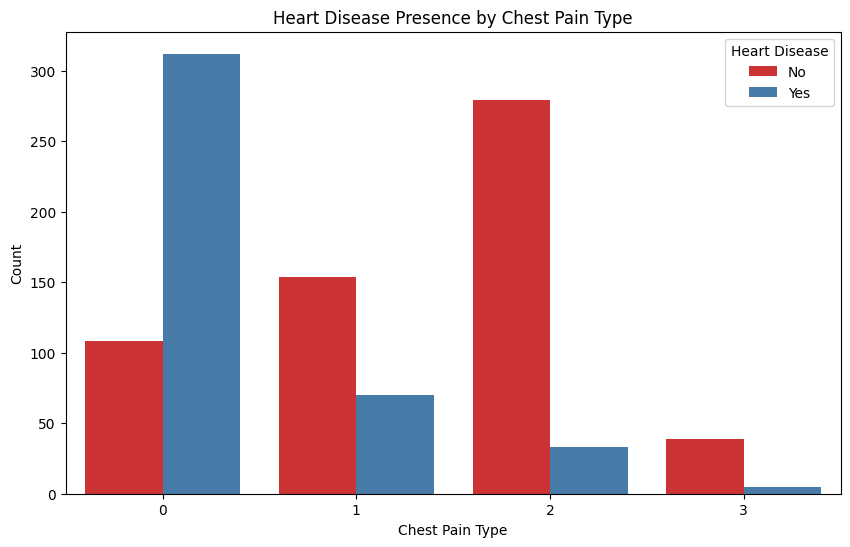

In [17]:
df['target'] = df['target'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


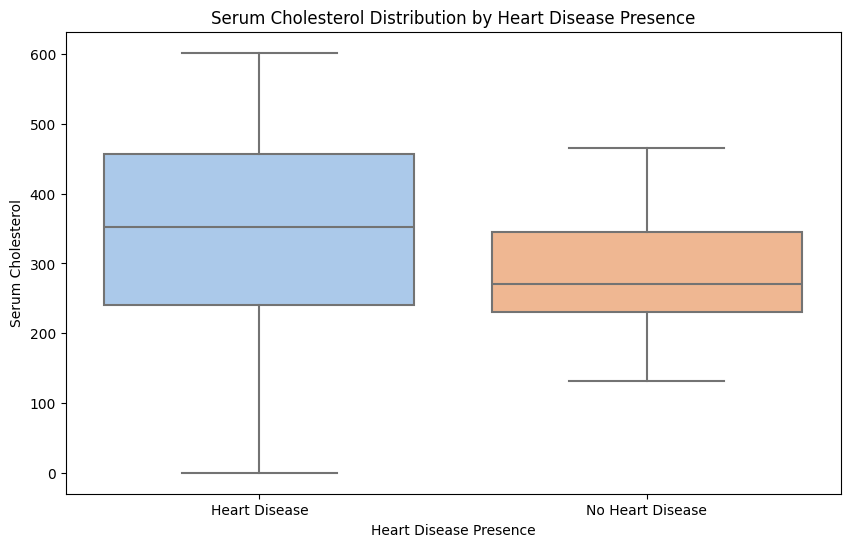

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['Heart Disease', 'No Heart Disease'])
plt.show()

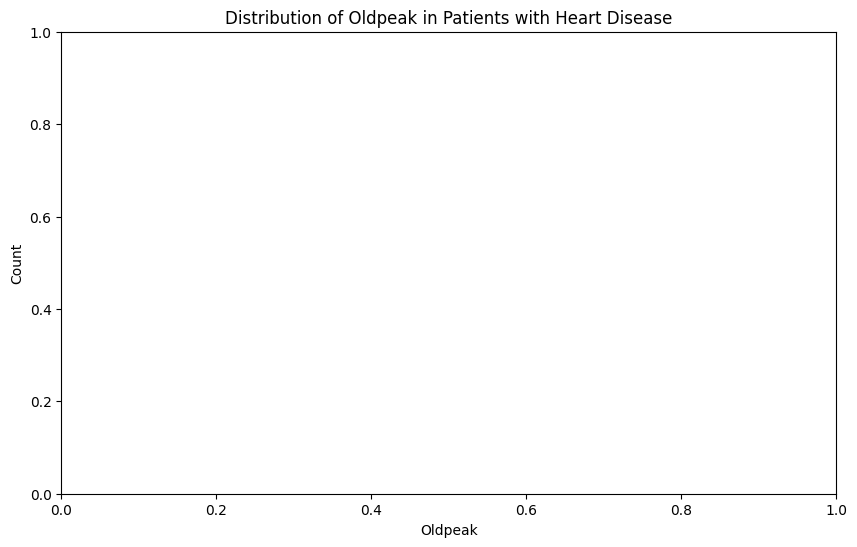

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='coral')
plt.title('Distribution of Oldpeak in Patients with Heart Disease')
plt.xlabel('Oldpeak')
plt.ylabel('Count')
plt.show()

In [20]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 116


/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/exa/anaconda3/envs/health/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

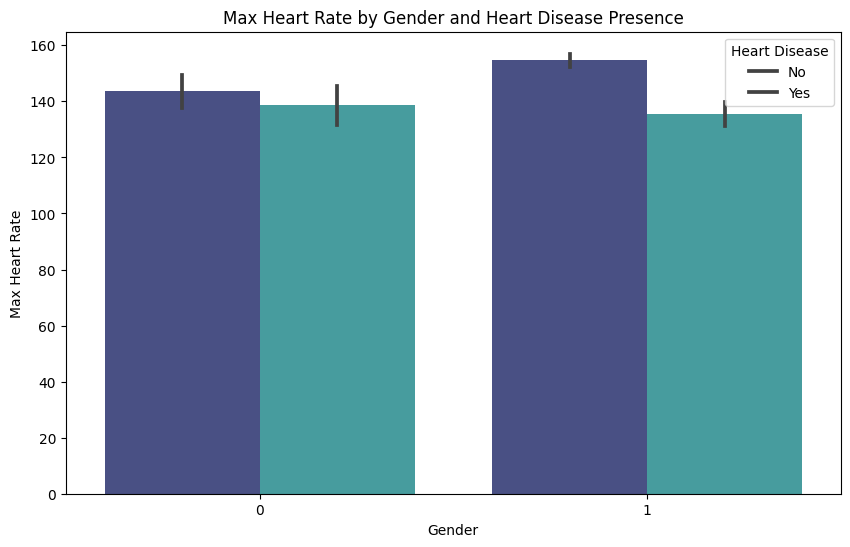

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

target categorizing

In [22]:
df.target.unique()
df = df.replace({'target' : {
                                    0 : 'Absence of Heart Disease',
                                    1 : 'Presence of Heart Disease',
        }}
)
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


normalisation

In [33]:
from sklearn.preprocessing import MinMaxScaler

# explain the normalisation why
X_disease = df.drop(columns='target')
y = df.target
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T.style.background_gradient(axis=0, cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
patientid,1000.000000,0.500161,0.292886,0.000000,0.246076,0.490432,0.766475,1.000000
age,1000.000000,0.487367,0.297746,0.000000,0.233333,0.483333,0.737500,1.000000
gender,1000.000000,0.765000,0.424211,0.000000,1.000000,1.000000,1.000000,1.000000
chestpain,1000.000000,0.326667,0.317719,0.000000,0.000000,0.333333,0.666667,1.000000
restingBP,1000.000000,0.544783,0.282691,0.000000,0.330189,0.500000,0.820755,1.000000
serumcholestrol,1000.000000,0.517354,0.220006,0.000000,0.391611,0.528239,0.671512,1.000000
fastingbloodsugar,1000.000000,0.296000,0.456719,0.000000,0.000000,0.000000,1.000000,1.000000
restingrelectro,1000.000000,0.374000,0.385061,0.000000,0.000000,0.500000,0.500000,1.000000
maxheartrate,1000.000000,0.568527,0.260994,0.000000,0.372137,0.572519,0.793893,1.000000
exerciseangia,1000.000000,0.498000,0.500246,0.000000,0.000000,0.000000,1.000000,1.000000


modeling

In [24]:
from sklearn import metrics

def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="plasma")
    ax.set_xlabel('Predicted labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    plt.show()

def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [25]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()
    
df.target.value_counts()

target
1    580
0    420
Name: count, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

R forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators' : [50, 150, 500],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

rf = RandomForestClassifier(n_jobs=-1)
rf_cv = GridSearchCV(estimator=rf, cv=20, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters : ', rf_cv.best_params_)
print('accuracy : ', rf_cv.best_score_)

Tuned hyper parameters :  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
accuracy :  0.9800142247510669


In [28]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier score : ', rf_score)

RandomForestClassifier score :  0.976


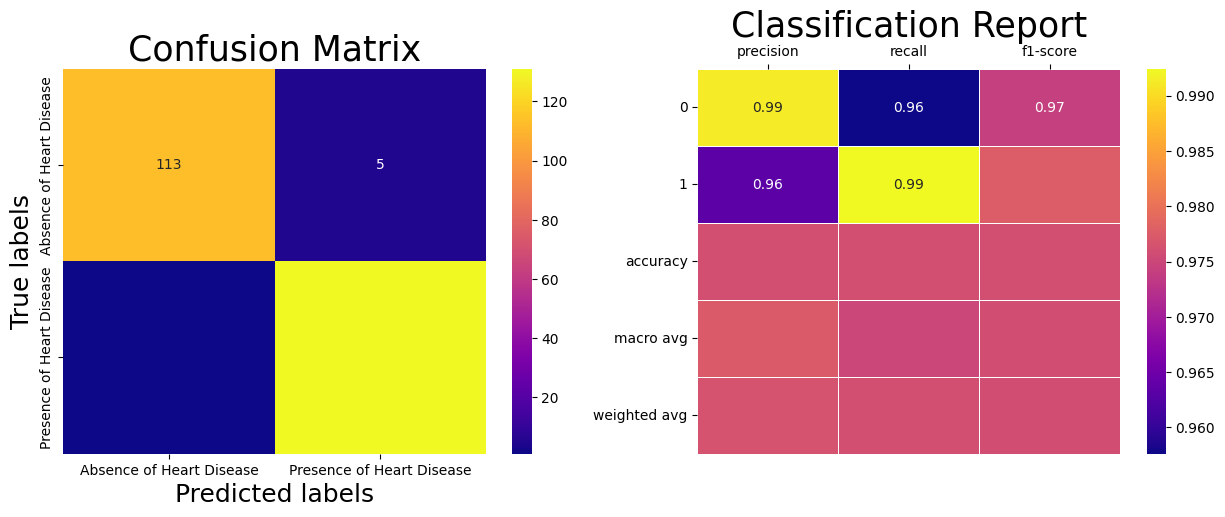

In [29]:
y_test.value_counts()
clf_plot(y_pred_rf)

In [30]:
rf = RandomForestClassifier(**rf_cv.best_params_)
rf.fit(X, y)

RandomForestClassifier(n_estimators=50)